In [677]:
import numpy as np
import random

In [678]:
class relu_neuron:
    def __init__(self, input_size, learning_rate):
        self.learning_rate = learning_rate
        self.input_size = input_size
        self.weights = np.array([np.random.normal(loc = 0.1/input_size, scale = 0.05/input_size) for a in range(input_size)])
    def forward(self, input):
        self.input = input
        self.activation = np.dot(self.weights, input)
        self.output = self.activation * int(self.activation >= 0)       # apply relu to activation
    def backward(self, prev_grad):
        k = int(self.output >= 0) * prev_grad                           # dG/da
        self.grad = np.array([k * a for a in self.input])               # dG/dw
        self.grad_out = np.array([k * a for a in self.weights])           # dG/dy
        self.weights = self.weights - self.learning_rate * self.grad

In [679]:
class hardsig_neuron:
    def __init__(self, input_size, learning_rate):
        self.learning_rate = learning_rate
        self.input_size = input_size
        self.weights = np.array([np.random.normal(loc = 0.1/input_size, scale = 0.05/input_size) for a in range(input_size)])
    def forward(self, input):
        self.input = input
        self.activation = np.dot(self.weights, input)
        if self.activation < 0:                                         # apply hard sigmoid to activation 
            self.output = 0
        elif self.activation < 1:
            self.output = self.activation
        else:
            self.output = 1
        # apply hard sigmoid to activation
    def backward(self, prev_grad):
        k = int(0 <= self.output < 1) * prev_grad                       # dG/da
        self.grad = np.array([k * a for a in self.input])               # dG/dw
        self.grad_out = np.array([k * a for a in self.weights])           # dG/dy
        self.weights = self.weights - self.learning_rate * self.grad

In [680]:
learning_rate = 0.0001
layer_size = 20
input_size = 9
#initialisation
n0 = hardsig_neuron(layer_size, learning_rate)
layer1 = [relu_neuron(input_size, learning_rate) for i in range(layer_size)]

In [681]:
def forward(input, label):
    layer1_out = []
    for neuron in layer1:
        neuron.forward(input)
        layer1_out.append(neuron.output)
    n0.forward(layer1_out)
    return  n0.output, (n0.output - label)**2

In [682]:
def backward(output, label):
    grad = 2*(output - label)              # dG/dx
    n0.backward(grad)                      # dG/dx * dx/da * dG/dw = dG/dw used to update weights
    grad = n0.grad_out                     # dG/dx * dx/da * dG/dy = dG/dy
    for i in range(len(layer1)):
        layer1[i].backward(grad[i])        # dG/dy * dy/da * dG/dw = dG/dw used to update weights

In [683]:
def train(images, labels):
    losses = []
    correct = []
    for i in range(len(images)):
        image = np.reshape(images[i], -1)
        output, loss = forward(image, labels[i])
        backward(output, labels[i])
        losses.append(loss)
        correct.append(int(round(output) == labels[i]))
    accuracy = sum(correct) / len(correct)
    return losses, correct, accuracy


In [684]:
# generate images & labels
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import skimage.measure
import random
n = 1000
images = []
labels = []
for i in range(n):
    width, height = 81, 81
    image = Image.new("1", (width, height), 0)
    draw = ImageDraw.Draw(image)
    x1, y1 = 0, random.randint(height//3, height//1.5)
    x2, y2 = width-1, random.randint(height//3, height//1.5)
    draw.line((x1, y1, x2, y2), fill=1 , width=1)
    image.save("random_line_image.png")
    convolved_image = Image.open(r"random_line_image.png").convert('RGB')
    rad = 10
    convolved_image = convolved_image.filter(ImageFilter.GaussianBlur(radius=rad))   
    convolved_image.save("convolved_image.png")
    convolved_array = 2.5*rad*np.array(convolved_image.convert('L'))
    small_array = skimage.measure.block_reduce(convolved_array, (27,27), np.average)
    mean = 0
    var = 256
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, small_array.shape)
    gauss = gauss.reshape(small_array.shape)
    noisy = small_array + gauss
    if random.randint(0,1) == 0:
        images.append(np.array(noisy))
        labels.append(1)
    else:
        images.append(np.transpose(np.array(noisy)))
        labels.append(0)
images = np.array(images)
labels = np.array(labels)

In [685]:
batches = 100
batch_size = np.floor(n/batches)
accuracies = []
for i in range(batches):
    a, b, c = train(images[int(i*batch_size):int((i+1)*batch_size)], labels[int(i*batch_size):int((i+1)*batch_size)])
    accuracies.append(c)


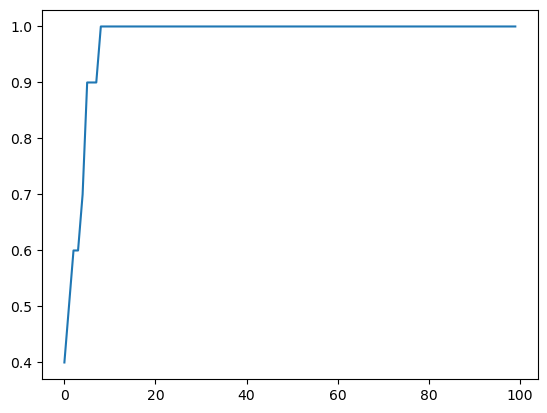

In [686]:
plt.plot(accuracies)

In [690]:
i = random.randint(0,1000)
output, loss = forward(np.reshape(images[i], -1), labels[i])
print(output, labels[i])

0 0
